In [1]:
import util
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


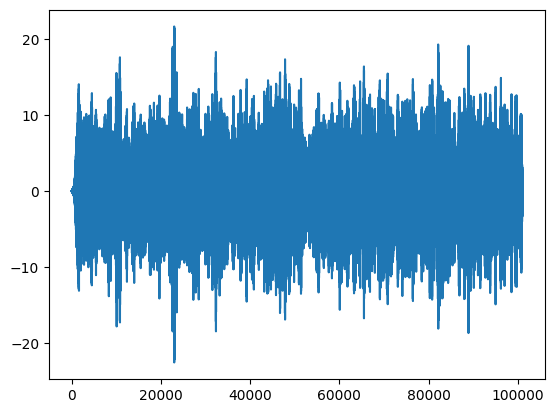

In [48]:
smp_a = np.random.uniform(-1,1,100000)
smp_b = np.imag(np.exp((100j+1)*np.linspace(0,4,1024)))
smp_b /= smp_b.sum()

conv_groundtruth = np.convolve(smp_a,smp_b,mode="full")

plt.plot(conv_groundtruth)
util.display_sound(conv_groundtruth)

In [5]:
conv_groundtruth.size,(smp_a.size+smp_b.size-1)

(100999, 100999)

rmse error from ground truth:  2.0331737144381732e-15


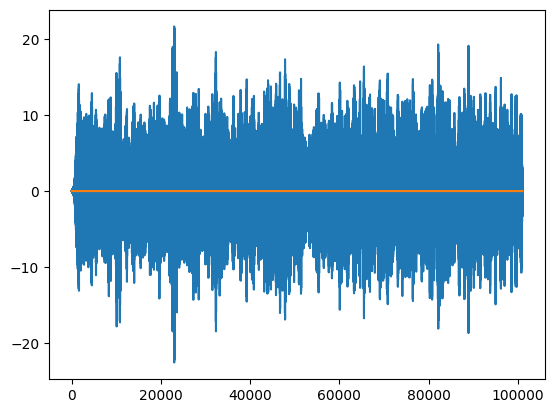

In [51]:
def conv_circular(a: NDArray, b: NDArray) -> NDArray:
    assert len(a.shape) == 1 and len(b.shape) == 1
    if b.size > a.size:
        return conv_circular(b, a)
    if b.size < a.size:
        return conv_circular(a, np.concatenate([b, np.zeros(a.size-b.size)]))

    return np.fft.ifft(np.fft.fft(a) * np.fft.fft(b))
    # np.real(conv_circular(
    #     np.array([1,2,3,4,5,6,7,8,9]),
    #     np.array([1,10,100,1000]),
    # ))[4-1:]
    # # -> array([1234., 2345., 3456., 4567., 5678., 6789.])

def conv_overlap_scrap(signal: NDArray, filter: NDArray) -> NDArray:
    N = 2048
    assert len(signal.shape) == 1 
    assert len(filter.shape) == 1 
    assert filter.size <= N//2
    chunk_size = N - filter.size + 1
    signal_len_in = signal.size
    signal = np.concatenate([np.zeros(filter.size - 1), signal, np.zeros(filter.size - 1)])
    signal = np.concatenate([signal, np.zeros((signal.size+chunk_size-1)//chunk_size*chunk_size-signal.size)])
    signal_out = []
    for i in range(signal.size//chunk_size):
        signal_out.append(
            np.real(conv_circular(
                signal[i*chunk_size:i*chunk_size+N],
                filter,
            )[filter.size-1:])
        )
    return np.concatenate(signal_out)[:signal_len_in + filter.size - 1]

conv_fast = conv_overlap_scrap(smp_a,smp_b)

print("rmse error from ground truth: ", np.sqrt(np.mean((conv_fast - conv_groundtruth)**2)))
plt.plot(conv_fast)
plt.plot(conv_fast-conv_groundtruth)
util.display_sound(conv_fast)

(101040, 100999)

In [55]:
smp_a.size + smp_b.size - 1

100999

In [20]:
np.concatenate([
    [1,2,3],
    np.zeros(5-3)
])

array([1., 2., 3., 0., 0.])

In [46]:
l = 32
# latency = size - filter_size
i = 0
while i < 10:
    s = l*2
    # filter_size = size - latency
    f = s - l
    for _ in range(1):
        i += 1
        l += f
        print(l,s,f, f/s)

64 64 32 0.5
128 128 64 0.5
256 256 128 0.5
512 512 256 0.5
1024 1024 512 0.5
2048 2048 1024 0.5
4096 4096 2048 0.5
8192 8192 4096 0.5
16384 16384 8192 0.5
32768 32768 16384 0.5
